In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
import numpy as np

In [2]:
image_plane_grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=1)

In [31]:
#Parâmetros do MGE

Surf_mge, sigma, qObs = np.loadtxt('/home/carlos/Documents/Dados Projeto/ESO325/Results/ESO325 MGE and JAM (07-07-20)/Codes/JAM Input.txt', unpack=True)

ML = 3.14
i = np.deg2rad(80)
M0 = Surf_mge*ML/1e4
M0 = M0[::-1]
q0 = np.sqrt(qObs**2 - np.cos(i)**2)/np.sin(i)
sigma0 = sigma

M0

array([0.17714294, 0.42711979, 1.07196422, 1.55069592, 2.07110471,
       0.78389699, 3.096937  ])

In [17]:
mass_profile = al.mp.MGE(centre=(0.0, 0.0), einstein_radius=1.6)
mass_profile.MGE_comps(M=M0, sigma=sigma0, q=q0)

lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, light=light_profile)

In [18]:
image_plane = al.Plane(galaxies=[lens_galaxy])

In [29]:
image_plane_grid

Grid([[ 2.475, -2.475],
      [ 2.475, -2.425],
      [ 2.475, -2.375],
      ...,
      [-2.475,  2.375],
      [-2.475,  2.425],
      [-2.475,  2.475]])

In [30]:
deflections = image_plane.deflections_from_grid(grid=image_plane_grid)

print("deflection-angles of _Plane_'s _Grid_ pixel 0:")
print(deflections.in_2d[0, 0, 0])
print(deflections.in_2d[0, 0, 1])

print("deflection-angles of _Plane_'s _Grid_ pixel 1:")
print(deflections.in_2d[0, 1, 0])
print(deflections.in_2d[0, 1, 1])

deflection-angles of _Plane_'s _Grid_ pixel 0:
1.3041553664979073
-1.2013617953248592
deflection-angles of _Plane_'s _Grid_ pixel 1:
1.326272529010604
-1.1964895825306185


Critical curve could not be calculated due to an unphysical mass model


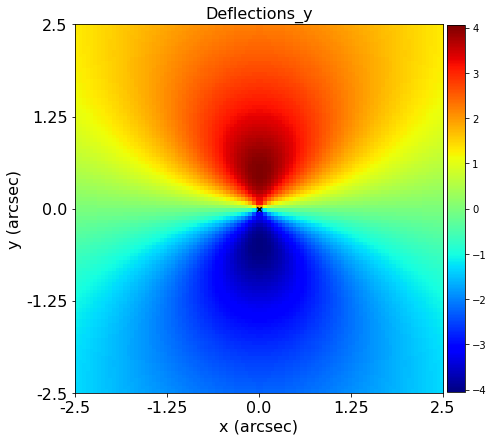

Critical curve could not be calculated due to an unphysical mass model


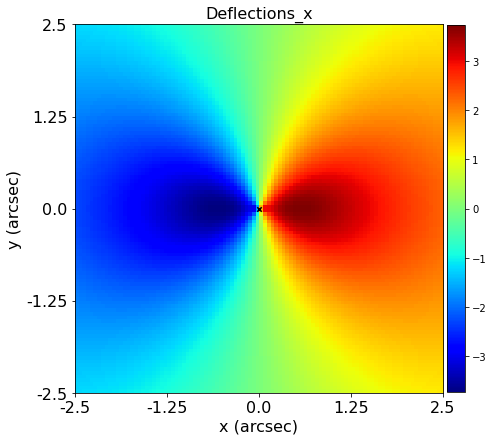

In [20]:
aplt.Plane.deflections_y(plane=image_plane, grid=image_plane_grid)
aplt.Plane.deflections_x(plane=image_plane, grid=image_plane_grid)

In [21]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)
print("Traced source-plane coordinates of _Grid_ pixel 0:")
print(source_plane_grid.in_2d[0, 0, :])
print("Traced source-plane coordinates of _Grid_ pixel 1:")
print(source_plane_grid.in_2d[0, 1, :])

Traced source-plane coordinates of _Grid_ pixel 0:
[ 1.17084463 -1.2736382 ]
Traced source-plane coordinates of _Grid_ pixel 1:
[ 1.14872747 -1.22851042]


In [22]:
source_plane = al.Plane(galaxies=[source_galaxy])

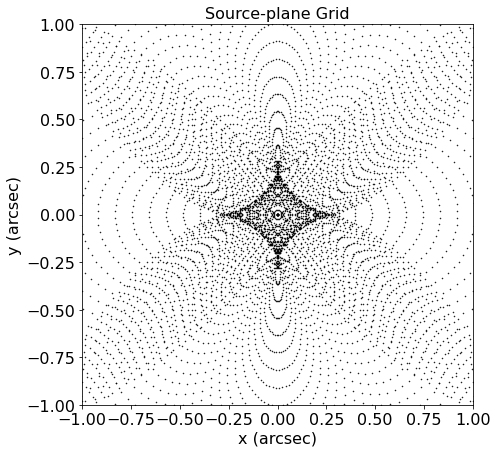

In [24]:
aplt.Plane.plane_grid(
    plane=source_plane,
    grid=source_plane_grid,
    axis_limits=[-1, 1, -1, 1],
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid")),
)

Critical curve could not be calculated due to an unphysical mass model
Caustics could not be calculated due to an unphysical mass model


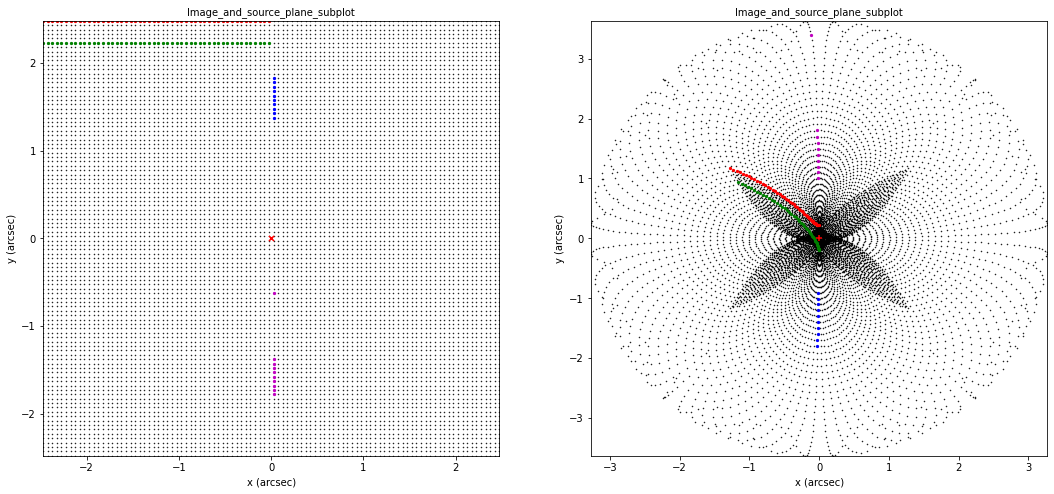

In [25]:
aplt.Plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    indexes=[
        range(0, 50),
        range(500, 550),
        [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250],
        [6250, 8550, 8450, 8350, 8250, 8150, 8050, 7950, 7850, 7750],
    ],
)



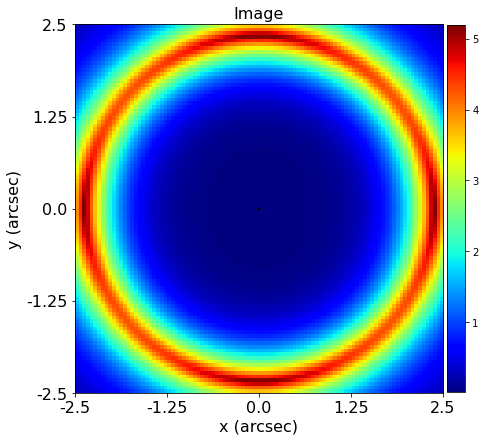

In [26]:
aplt.Plane.image(plane=source_plane, grid=source_plane_grid)

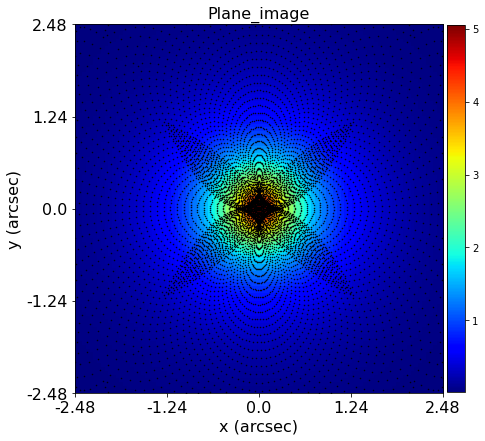

In [27]:
aplt.Plane.plane_image(
    plane=source_plane, grid=source_plane_grid, include=aplt.Include(grid=True)
)

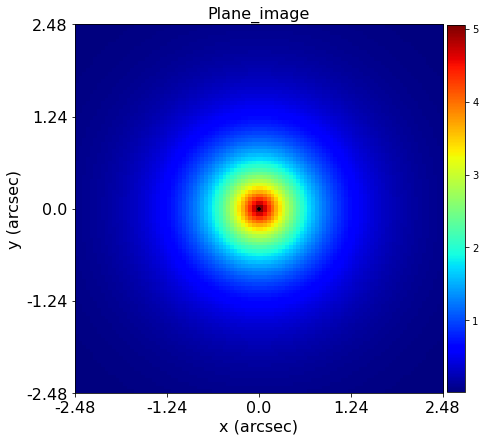

In [28]:
aplt.Plane.plane_image(
    plane=source_plane, grid=source_plane_grid, include=aplt.Include(grid=False)
)

